In [9]:
import pandas as pd
from copulas.multivariate import GaussianMultivariate
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [42]:
df = pd.read_csv("sampleData_digitalAg.csv")
df.head()

,id,batch,location,group,varroa_count,sb,afb,nosema,abpv,bqcv,dwv,kv,vdv1
0,A003,2,Island,1,15,1,0,0.0,0.013689,0.001933,0.000420,0.000069,0.037333
1,A005,2,Island,1,27,1,0,0.0,0.024173,0.007734,0.000620,0.000983,0.000281
2,A006,2,Island,1,11,1,1,0.0,0.001234,0.000048,0.016172,0.011731,0.008533
3,A007,2,Island,1,1,1,0,0.0,0.001683,0.000244,0.002593,0.001105,0.003694
4,A009,2,Island,1,2,1,0,0.0,0.002019,0.000976,0.000309,0.000048,0.020533


In [43]:
df = df.iloc[:,3:13]
df.head()

,group,varroa_count,sb,afb,nosema,abpv,bqcv,dwv,kv,vdv1
0,1,15,1,0,0.0,0.013689,0.001933,0.000420,0.000069,0.037333
1,1,27,1,0,0.0,0.024173,0.007734,0.000620,0.000983,0.000281
2,1,11,1,1,0.0,0.001234,0.000048,0.016172,0.011731,0.008533
3,1,1,1,0,0.0,0.001683,0.000244,0.002593,0.001105,0.003694
4,1,2,1,0,0.0,0.002019,0.000976,0.000309,0.000048,0.020533


In [62]:
df.describe()

,group,varroa_count,sb,afb,nosema,abpv,bqcv,dwv,kv,vdv1
count,113.000000,113.000000,113.000000,113.000000,113.000000,1.130000e+02,113.000000,1.130000e+02,113.000000,113.000000
mean,0.371681,15.415929,0.663717,0.309735,0.295841,2.060108e-03,0.005914,8.447370e-02,0.033176,0.067214
std,0.485406,19.575279,0.474541,0.464444,0.373395,5.049930e-03,0.007639,1.077652e-01,0.042633,0.094187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000005,1.730687e-07,0.000000,0.000002
25%,0.000000,2.000000,0.000000,0.000000,0.000000,2.026274e-07,0.000603,2.802498e-03,0.001097,0.003938
50%,0.000000,8.000000,1.000000,0.000000,0.087848,8.626305e-05,0.002678,3.759986e-02,0.016983,0.025145
75%,1.000000,20.000000,1.000000,1.000000,0.515899,1.995230e-03,0.007685,1.314570e-01,0.047658,0.099005
max,1.000000,72.000000,1.000000,1.000000,1.521599,3.547931e-02,0.033687,4.692869e-01,0.207134,0.498452


In [45]:
copula = GaussianMultivariate(random_state=1)
copula.fit(df)

/Users/hasimhakanoglu/anaconda3/envs/digital_ag_python/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/hasimhakanoglu/anaconda3/envs/digital_ag_python/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/hasimhakanoglu/anaconda3/envs/digital_ag_python/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/Users/hasimhakanoglu/anaconda3/envs/digital_ag_python/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5990: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
/Users/hasimhakanoglu/anaconda3/envs/digital_ag_python/lib/python3.11/site-packa

In [90]:
synthetic_data = copula.sample(num_rows=5000)
synthetic_data.head()

,group,varroa_count,sb,afb,nosema,abpv,bqcv,dwv,kv,vdv1
0,0.965984,0.061856,0.987335,0.151220,0.327951,0.002861,0.006592,0.000003,0.000006,0.000022
1,0.009614,26.510702,0.118165,-0.002614,0.052996,0.000001,0.001592,0.325222,0.130404,0.172209
2,0.914785,0.016079,-0.127809,-0.112624,-0.117026,0.000038,0.016722,0.002360,0.000183,0.004681
3,0.241180,5.896857,1.013760,-0.068995,0.612118,0.000002,0.002406,0.182494,0.052269,0.064905
4,1.079027,1.983459,0.766256,0.894831,0.080940,0.000320,0.000055,0.018988,0.000953,0.000890


In [91]:
synthetic_data.describe()

,group,varroa_count,sb,afb,nosema,abpv,bqcv,dwv,kv,vdv1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,0.372715,10.230154,0.666339,0.305285,0.295409,6.758794e-04,0.006573,0.091399,3.116216e-02,0.059412
std,0.518846,14.106279,0.498613,0.498957,0.367855,1.429633e-03,0.007877,0.112413,4.482364e-02,0.086246
min,-0.681038,0.000003,-0.595018,-0.559232,-1.009579,4.934630e-22,0.000005,0.000002,1.291061e-11,0.000002
25%,-0.046935,1.107895,0.126989,-0.068999,0.043864,3.063364e-06,0.000488,0.005183,1.460567e-03,0.005640
50%,0.161442,4.875192,0.868460,0.098982,0.300537,8.376377e-05,0.003053,0.042858,1.202425e-02,0.026518
75%,0.914260,13.384466,1.051128,0.845611,0.540724,6.740637e-04,0.010278,0.141455,4.310738e-02,0.079474
max,1.646868,150.494383,1.598937,1.624269,1.748582,1.639742e-02,0.034085,0.482679,3.300003e-01,0.851726


In [92]:
df_max = list()
df_min = list()

for i in range(df.shape[1]):
    df_max.append(max(df.iloc[:, i]))

for i in range(df.shape[1]):
    df_min.append(min(df.iloc[:, i]))

print(df_max)
print(df_min)

[1, 72, 1, 1, 1.52159941, 0.035479308, 0.033687139, 0.469286908, 0.207134385, 0.498452487]
[0, 0, 0, 0, 0.0, 0.0, 5.36156081371677e-06, 1.73068675688878e-07, 0.0, 1.54800315477274e-06]


In [94]:
synthetic_data = synthetic_data[(synthetic_data["varroa_count"] >= df_min[1]) & (synthetic_data["varroa_count"] <= df_max[1])]
synthetic_data = synthetic_data[(synthetic_data["nosema"] >= df_min[4]) & (synthetic_data["nosema"] <= df_max[4])]
synthetic_data = synthetic_data[(synthetic_data["abpv"] >= df_min[5]) & (synthetic_data["abpv"] <= df_max[5])]
synthetic_data = synthetic_data[(synthetic_data["bqcv"] >= df_min[6]) & (synthetic_data["bqcv"] <= df_max[6])]
synthetic_data = synthetic_data[(synthetic_data["dwv"] >= df_min[7]) & (synthetic_data["dwv"] <= df_max[7])]
synthetic_data = synthetic_data[(synthetic_data["kv"] >= df_min[8]) & (synthetic_data["kv"] <= df_max[8])]
synthetic_data = synthetic_data[(synthetic_data["vdv1"] >= df_min[9]) & (synthetic_data["vdv1"] <= df_max[9])]

In [95]:
synthetic_data.describe()

,group,varroa_count,sb,afb,nosema,abpv,bqcv,dwv,kv,vdv1
count,3860.000000,3860.000000,3860.000000,3860.000000,3860.000000,3.860000e+03,3860.000000,3860.000000,3.860000e+03,3860.000000
mean,0.312265,10.223253,0.700448,0.317766,0.428748,6.037700e-04,0.006512,0.092368,2.961750e-02,0.053812
std,0.496046,12.641002,0.489262,0.499432,0.274182,1.302612e-03,0.007824,0.109067,4.012702e-02,0.072776
min,-0.681038,0.000004,-0.475758,-0.559232,0.000057,1.659605e-17,0.000005,0.000002,1.291061e-11,0.000002
25%,-0.067237,1.400590,0.172778,-0.061704,0.217733,2.499254e-06,0.000476,0.006646,1.615267e-03,0.005373
50%,0.113946,5.411625,0.893723,0.109890,0.391129,7.051010e-05,0.003007,0.046043,1.260187e-02,0.024999
75%,0.840645,13.734714,1.066104,0.858767,0.605381,5.675356e-04,0.010223,0.145894,4.259678e-02,0.073562
max,1.646868,71.418206,1.598937,1.624269,1.447341,1.639742e-02,0.033347,0.462419,2.063582e-01,0.487550


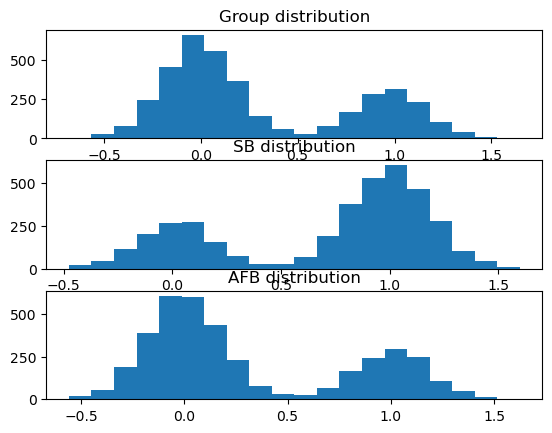

In [96]:
fig, axs = plt.subplots(3)
axs[0].hist(synthetic_data[["group"]], bins=20)
axs[0].set_title("Group distribution")
axs[1].hist(synthetic_data[["sb"]], bins=20)
axs[1].set_title("SB distribution")
axs[2].hist(synthetic_data[["afb"]], bins=20)
axs[2].set_title("AFB distribution")

plt.show() 

In [97]:
synthetic_data.to_csv("synth_data.csv")